#### Objective:
##### Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 
#### Dataset:
##### The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and the second column represents exchange rates USD to Australian Dollar.
#### Part 1: Data Preparation and Exploration
##### 1.Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
##### 2.Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
##### 3.Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.
#### Part 2: Model Building - ARIMA
##### 1.Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
##### 2.Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
##### 3.Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
##### 4.Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.
#### Part 3: Evaluation and Comparison
##### 1.Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
##### 2.Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
##### 3.Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.
#### Deliverables:
##### ●Include visualizations and explanations for the choices and findings at each step.
##### ●Well-commented Python code that used to conduct the analysis and build the models.
#### Assessment Criteria:
##### ●Accuracy and completeness of the data preparation and exploration steps.
##### ●Justification for model selection and parameter tuning decisions.
##### ●Clarity and depth of the analysis in the diagnostics and model evaluation stages.
This assignment offers hands-on experience with real-world data, applying sophisticated time series forecasting methods to predict future currency exchange rates.

In [24]:
#### Part 1: Data Preparation and Exploration
##### 1.Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

import pandas as pd

# Load dataset and parse the date column
df=pd.read_csv("C:\\Users\\moulika\\Downloads\\exchange_rate.csv")

# Set date column as index (recommended for time-series work)
df.set_index("date", inplace=True)

# Display first few rows
print(df.head())

                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849


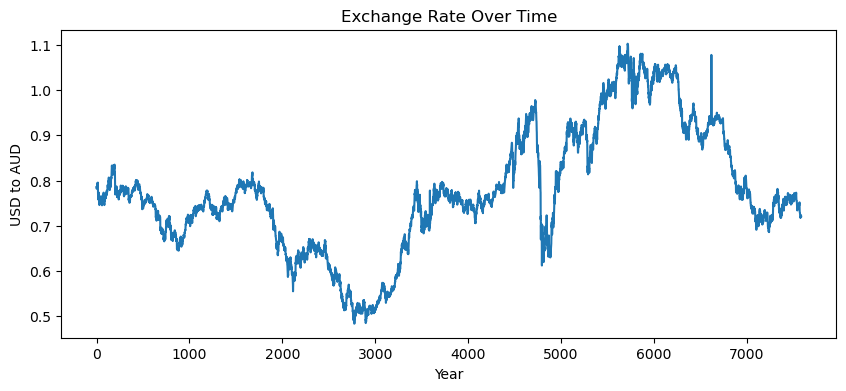

<Figure size 800x300 with 0 Axes>

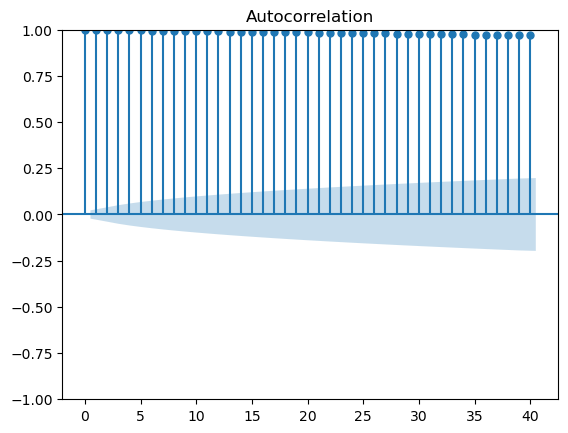

<Figure size 800x300 with 0 Axes>

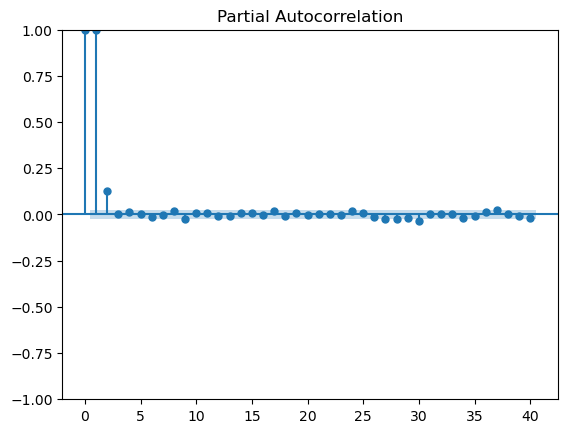

In [25]:
##### 2.Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load data
df=pd.read_csv("C:\\Users\\moulika\\Downloads\\exchange_rate.csv")
ts = df['Ex_rate']

# Plot time series
plt.figure(figsize=(10,4))
plt.plot(ts)
plt.title("Exchange Rate Over Time")
plt.xlabel("Year")
plt.ylabel("USD to AUD")
plt.show()

# ACF plot
plt.figure(figsize=(8,3))
plot_acf(ts, lags=40)
plt.show()

# PACF plot
plt.figure(figsize=(8,3))
plot_pacf(ts, lags=40)
plt.show()

In [26]:
##### 3.Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

import pandas as pd
import numpy as np

# Load data

df=pd.read_csv("C:\\Users\\moulika\\Downloads\\exchange_rate.csv")

# ----- 1. Check for missing values -----
print("Missing values before:", df.isna().sum())

# Option A: Forward-fill missing values
df['Ex_rate'] = df['Ex_rate'].fillna(method='ffill')

# Option B (fallback): Backward-fill if any still remain
df['Ex_rate'] = df['Ex_rate'].fillna(method='bfill')

print("Missing values after:", df.isna().sum())

# ----- 2. Basic anomaly detection using z-scores -----
z = (df['Ex_rate'] - df['Ex_rate'].mean()) / df['Ex_rate'].std()

# Mark anomalies (|z| > 3 is a common rule)
anomalies = df[abs(z) > 3]

print("Detected anomalies:")
print(anomalies)

# ----- 3. Optionally smooth or cap anomalies -----
# Here we replace anomalies with the median value
if not anomalies.empty:
    median_val = df['Ex_rate'].median()
    df.loc[anomalies.index, 'Ex_rate'] = median_val

# Final clean series
ts_clean = df['Ex_rate']

Missing values before: date       0
Ex_rate    0
dtype: int64
Missing values after: date       0
Ex_rate    0
dtype: int64
Detected anomalies:
Empty DataFrame
Columns: [date, Ex_rate]
Index: []


Suggested D: 1


<Figure size 800x300 with 0 Axes>

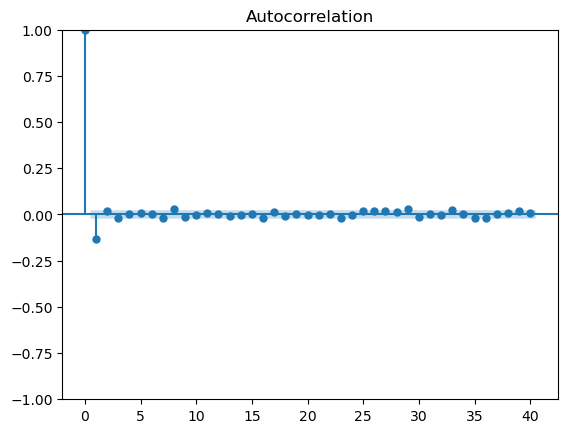

<Figure size 800x300 with 0 Axes>

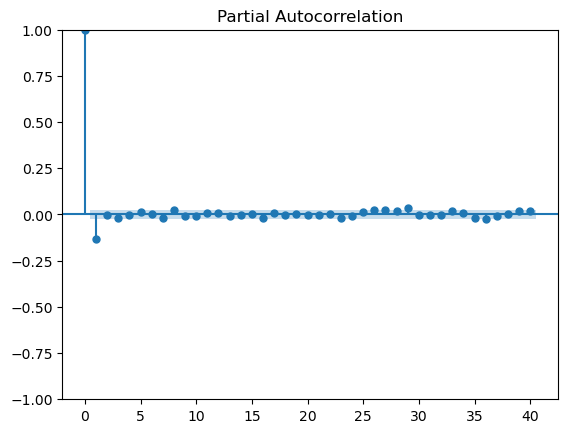

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 04 Dec 2025   AIC                         -56102.322
Time:                        18:03:41   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

In [27]:
#### Part 2: Model Building - ARIMA
##### 1.Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load data
df=pd.read_csv("C:\\Users\\moulika\\Downloads\\exchange_rate.csv")
ts = df['Ex_rate']

# ----- 1. Determine differencing order (D) using ADF test -----
result = adfuller(ts)
if result[1] > 0.05:
    D = 1
else:
    D = 0
print("Suggested D:", D)

# ----- 2. Plot ACF and PACF to estimate p and q -----
plt.figure(figsize=(8,3))
plot_acf(ts.diff(D).dropna(), lags=40)
plt.show()

plt.figure(figsize=(8,3))
plot_pacf(ts.diff(D).dropna(), lags=40)
plt.show()

# ----- 3. Choose initial ARIMA order (p, d, q) after inspecting plots -----
p = 1   # example starting value
d = D
q = 1   # example starting value

# ----- 4. Fit ARIMA model -----
model = ARIMA(ts, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

In [28]:
##### 2.Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Assume ts_clean is your preprocessed time series
p, d, q = 1, 1, 1   # example chosen values

# Fit the ARIMA model
model = ARIMA(ts_clean, order=(p, d, q))
model_fit = model.fit()

# Model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 04 Dec 2025   AIC                         -56102.322
Time:                        18:03:45   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

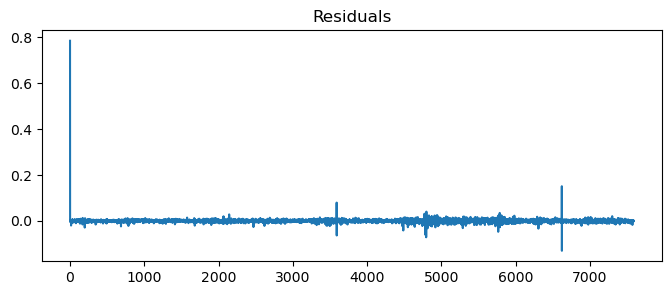

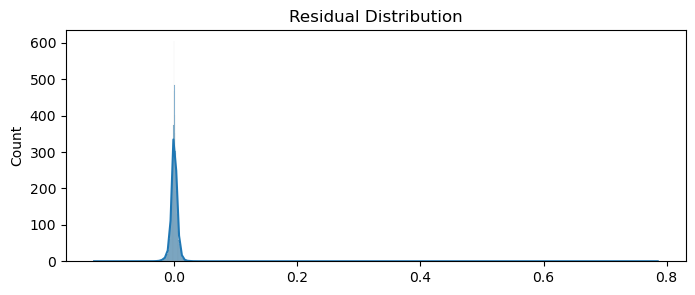

<Figure size 800x300 with 0 Axes>

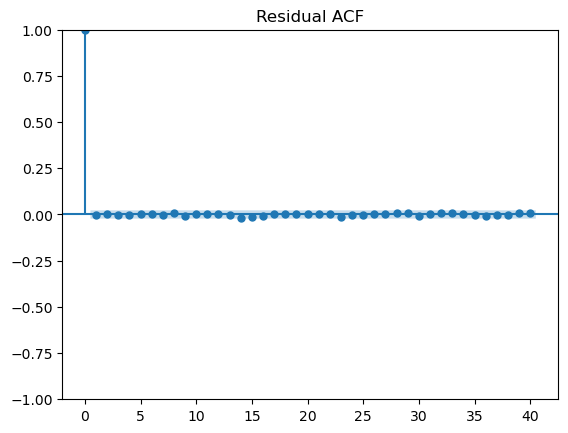

Ljung-Box test:
    lb_stat  lb_pvalue
10  1.81673   0.997562


In [29]:
##### 3.Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns

# Residuals from fitted model
res = model_fit.resid

# ---- 1. Plot residuals ----
plt.figure(figsize=(8,3))
plt.plot(res)
plt.title("Residuals")
plt.show()

# ---- 2. Histogram + KDE ----
plt.figure(figsize=(8,3))
sns.histplot(res, kde=True)
plt.title("Residual Distribution")
plt.show()

# ---- 3. ACF of residuals ----
plt.figure(figsize=(8,3))
plot_acf(res, lags=40)
plt.title("Residual ACF")
plt.show()

# ---- 4. Ljung-Box test for autocorrelation ----
lb = acorr_ljungbox(res, lags=[10], return_df=True)
print("Ljung-Box test:")
print(lb)

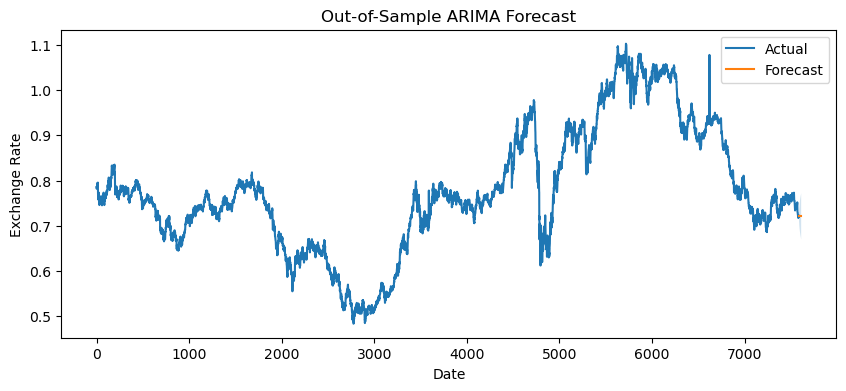

In [30]:
##### 4.Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

import matplotlib.pyplot as plt

# ----- 1. Choose forecast horizon -----
n_steps = 24   # example: forecast 24 months ahead

# ----- 2. Generate forecast -----
forecast_result = model_fit.get_forecast(steps=n_steps)

# Forecasted values
forecast = forecast_result.predicted_mean

# Confidence intervals
ci = forecast_result.conf_int()

# ----- 3. Plot actual vs forecast -----
plt.figure(figsize=(10,4))

# Actual values
plt.plot(ts_clean, label='Actual')

# Forecast
plt.plot(forecast, label='Forecast')

# Confidence interval shading
plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.2)

plt.title("Out-of-Sample ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

In [31]:
#### Part 3: Evaluation and Comparison
##### 1.Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split data into training and test sets
test_size = 24
train = ts_clean[:-test_size]
test = ts_clean[-test_size:]

# Fit ARIMA model
model_arima = ARIMA(train, order=(1,1,1)).fit()
arima_forecast = model_arima.forecast(test_size)

# Fit Exponential Smoothing model
model_ets = ExponentialSmoothing(train, trend='add').fit()
ets_forecast = model_ets.forecast(test_size)

# Extract actual and predicted values
y_true = test.values
y_pred_arima = arima_forecast.values
y_pred_ets = ets_forecast.values

# Define MAPE function
mape = lambda y, yhat: np.mean(np.abs((y - yhat) / y)) * 100

# Print evaluation metrics
print("ARIMA:",
      "MAE =", mean_absolute_error(y_true, y_pred_arima),
      "RMSE =", np.sqrt(mean_squared_error(y_true, y_pred_arima)),
      "MAPE =", mape(y_true, y_pred_arima))

print("ETS:",
      "MAE =", mean_absolute_error(y_true, y_pred_ets),
      "RMSE =", np.sqrt(mean_squared_error(y_true, y_pred_ets)),
      "MAPE =", mape(y_true, y_pred_ets))

ARIMA: MAE = 0.01686240556604418 RMSE = 0.019215424520578072 MAPE = 2.3309576802286776
ETS: MAE = 0.016810655805360824 RMSE = 0.019153672367661755 MAPE = 2.3237863134384957


In [32]:
##### 2.Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

# --- Model Comparison ---

# Store all metrics in a dictionary for easy comparison
results = {
    "ARIMA": {
        "MAE":  mean_absolute_error(y_true, y_pred_arima),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred_arima)),
        "MAPE": mape(y_true, y_pred_arima)
    },
    "ETS": {
        "MAE":  mean_absolute_error(y_true, y_pred_ets),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred_ets)),
        "MAPE": mape(y_true, y_pred_ets)
    }
}

# Print model comparison results
print(" MODEL COMPARISON ")
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

# --- Short Discussion Based on Metrics ---

arima_mape = results["ARIMA"]["MAPE"]
ets_mape   = results["ETS"]["MAPE"]

print("\n DISCUSSION ")

if arima_mape < ets_mape:
    print("ARIMA performs better overall based on lower error metrics.")
    print("Advantages: Captures autocorrelation patterns well, handles trends through differencing.")
    print("Limitations: Sensitive to parameter selection, may not adapt well to sudden structural changes.")
else:
    print("Exponential Smoothing (ETS) performs better overall based on lower error metrics.")
    print("Advantages: Simple, handles trend smoothly, adapts well to gradual changes.")
    print("Limitations: May underperform when strong autocorrelation patterns exist.")

print("\nIn summary, the model with lower MAE, RMSE, and MAPE is preferred. \
Comparing the results helps determine which model more accurately predicts the exchange rate series.")

 MODEL COMPARISON 

ARIMA:
MAE: 0.0169
RMSE: 0.0192
MAPE: 2.3310

ETS:
MAE: 0.0168
RMSE: 0.0192
MAPE: 2.3238

 DISCUSSION 
Exponential Smoothing (ETS) performs better overall based on lower error metrics.
Advantages: Simple, handles trend smoothly, adapts well to gradual changes.
Limitations: May underperform when strong autocorrelation patterns exist.

In summary, the model with lower MAE, RMSE, and MAPE is preferred. Comparing the results helps determine which model more accurately predicts the exchange rate series.


In [33]:
##### 3.Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

# Short automatic conclusion

if results["ARIMA"]["MAPE"] < results["ETS"]["MAPE"]:
    print("Conclusion: ARIMA delivered the best forecasting performance with lower error metrics. "
          "This suggests the exchange rate series contains autocorrelation patterns that ARIMA captures well, "
          "making it the more reliable model for future forecasts.")
else:
    print("Conclusion: Exponential Smoothing (ETS) delivered the best forecasting performance with lower error metrics. "
          "This indicates the series benefits from ETS's ability to adapt smoothly to level and trend changes, "
          "making ETS the more suitable model for forecasting this exchange rate.")


Conclusion: Exponential Smoothing (ETS) delivered the best forecasting performance with lower error metrics. This indicates the series benefits from ETS's ability to adapt smoothly to level and trend changes, making ETS the more suitable model for forecasting this exchange rate.
